In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\P3=wine\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [53]:
df.shape

(1599, 12)

In [54]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

<AxesSubplot:xlabel='quality', ylabel='count'>

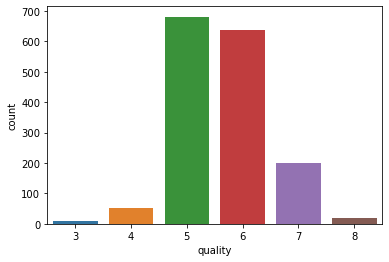

In [55]:
sn.countplot(df["quality"])

The model will be biased over 5,6 nad 7 as these have the highest count

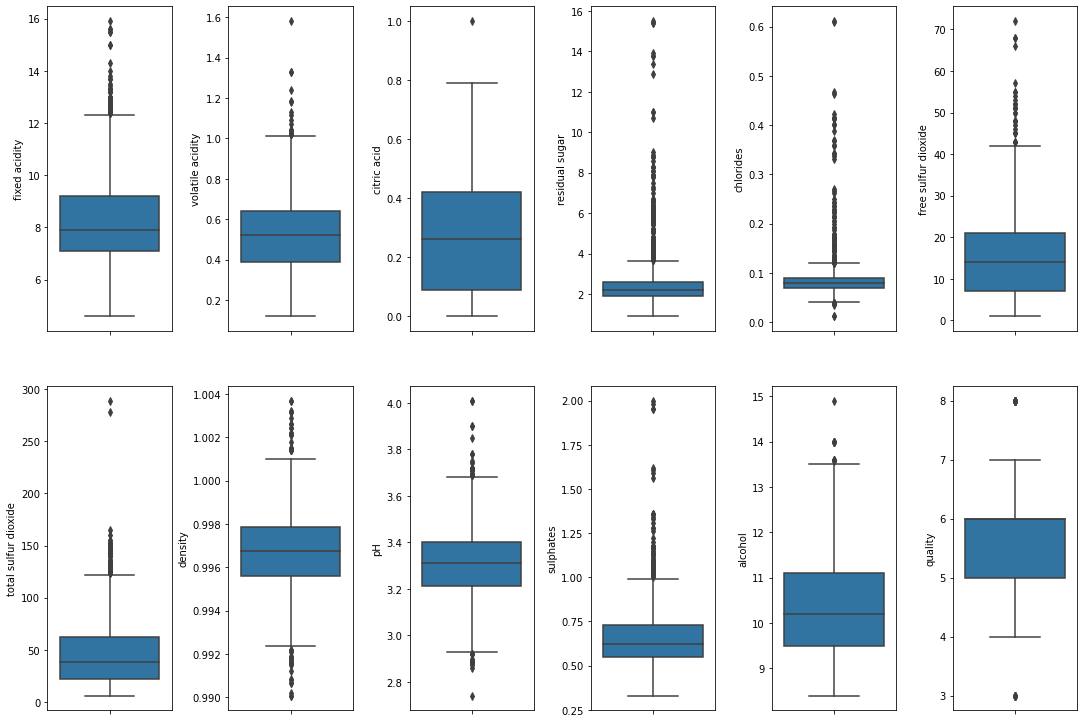

In [56]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

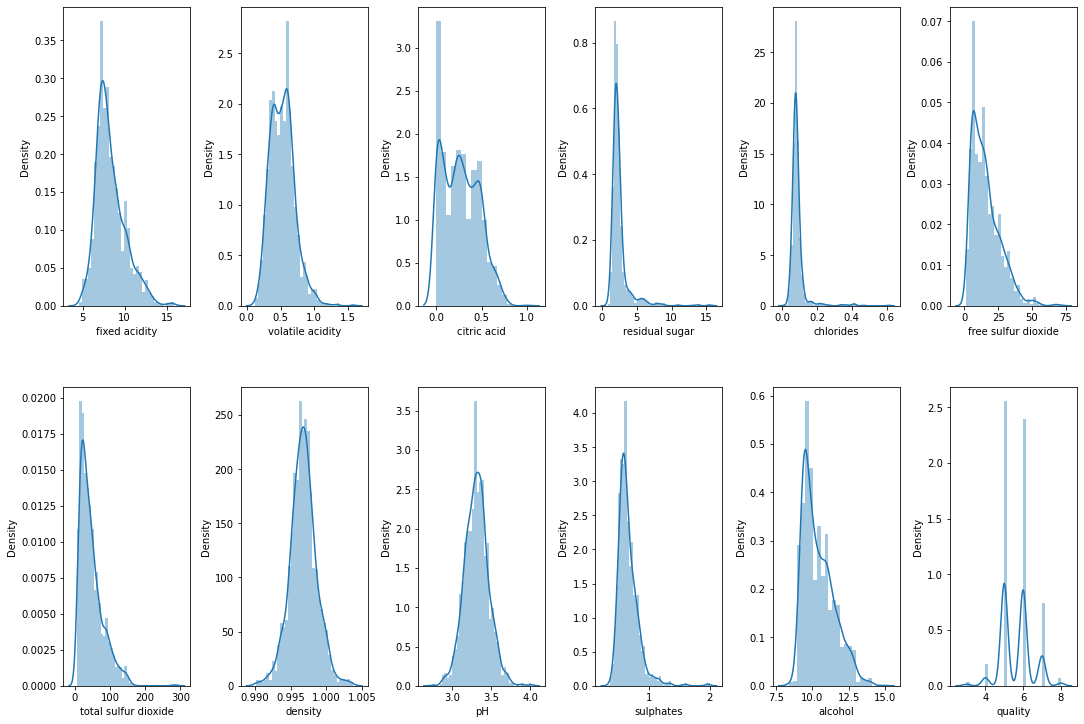

In [57]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.distplot(value,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# BI VARIANT ANALYSIS

In [58]:
cor=df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

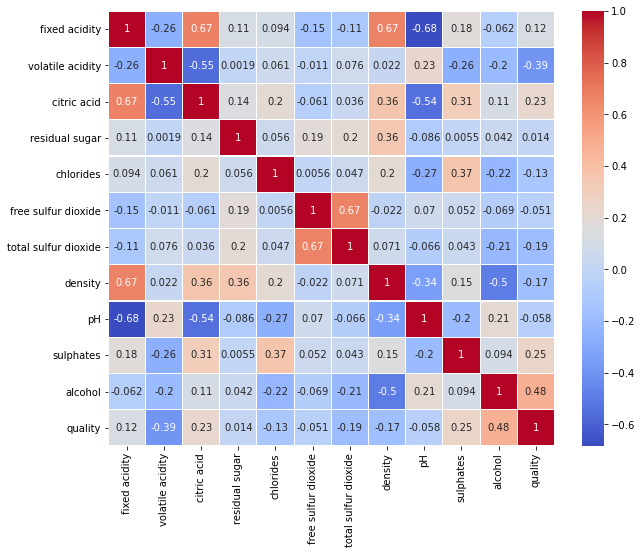

In [59]:
plt.figure(figsize=(10,8))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

as we are getting a high correlation between free sulphur dioxide and total sulphur dioxide so we drop free sulphur dioxide

In [60]:
df=df.drop("free sulfur dioxide",axis=1)

# Removing Outliers

In [61]:
from scipy.stats import zscore

In [62]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [63]:
df.shape

(1464, 11)

In [64]:
dataloss=((1599-1464)*100)/1599
dataloss

8.442776735459661

Our dataloss is 8.4%

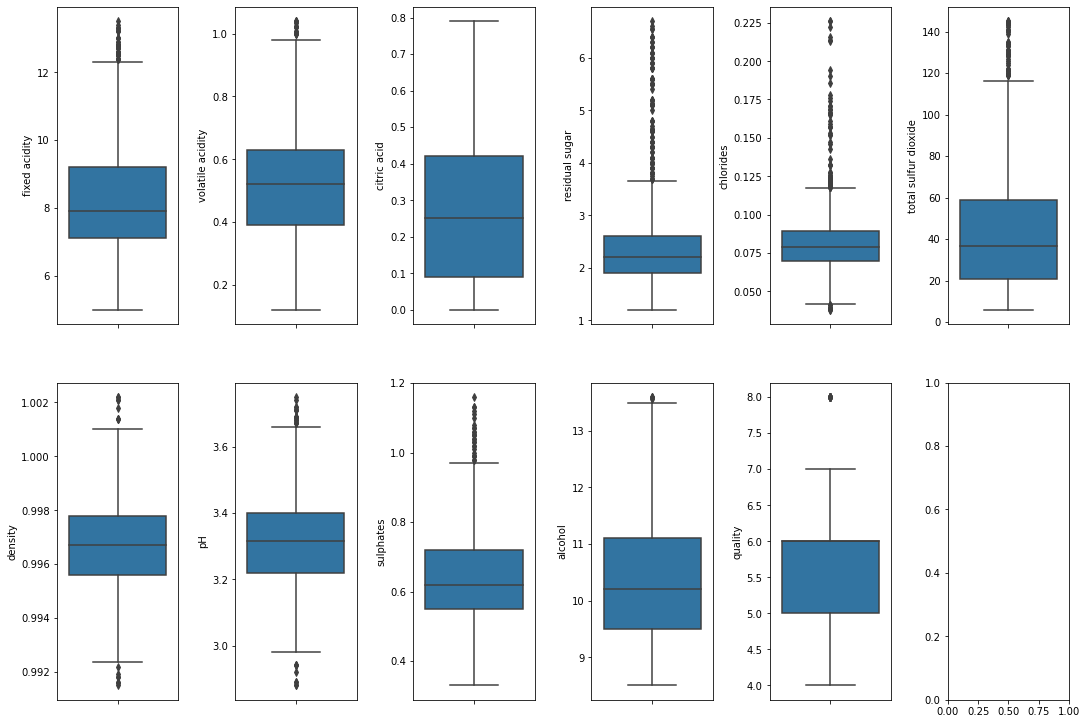

In [65]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Skewness

In [66]:
df.skew()

fixed acidity           0.826775
volatile acidity        0.368682
citric acid             0.294200
residual sugar          2.418374
chlorides               2.267238
total sulfur dioxide    1.167295
density                 0.058167
pH                      0.118064
sulphates               0.875621
alcohol                 0.759533
quality                 0.410573
dtype: float64

# Removing Skewness

# fixed acidity

In [67]:
fa=np.log10(df["fixed acidity"])
df["fixed acidity"]=fa
fa.skew()

0.38148591420231076

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

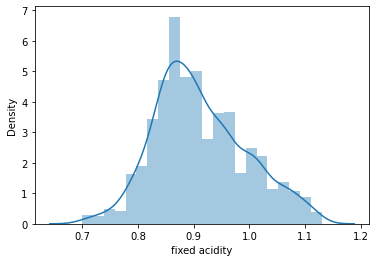

In [68]:
sn.distplot(df["fixed acidity"])

# residual sugar

In [69]:
rs=np.log10(df["residual sugar"])
df["residual sugar"]=rs
rs.skew()

1.2190058584704797

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

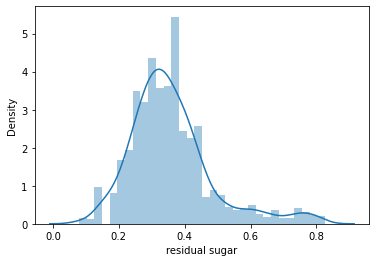

In [70]:
sn.distplot(df["residual sugar"])

# chlorides  

In [71]:
cl=np.log10(df["chlorides"])
df["chlorides"]=cl
cl.skew()

0.5099259558690306

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

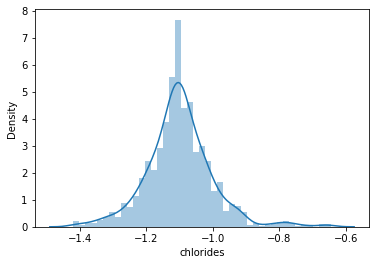

In [72]:
sn.distplot(df["chlorides"])

# total sulfur dioxide

In [73]:
tsd=np.log10(df["total sulfur dioxide"])
df["total sulfur dioxide"]=tsd
tsd.skew()

-0.10448852562789619

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

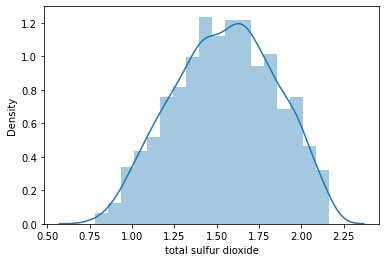

In [74]:
sn.distplot(df["total sulfur dioxide"])

# sulphates

In [75]:
s=np.log10(df["sulphates"])
df["sulphates"]=s
s.skew()

0.3308808966454489

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

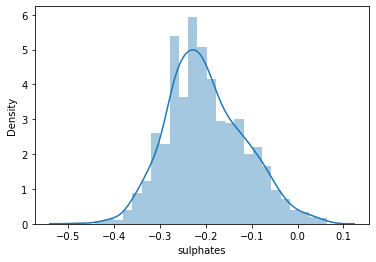

In [76]:
sn.distplot(df["sulphates"])

# alcohol

In [77]:
from scipy.stats import boxcox

In [78]:
a=boxcox(df["alcohol"])[0]
pd.Series(a).skew()

0.11241767330745771

In [79]:
df["alcohol"]=a

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

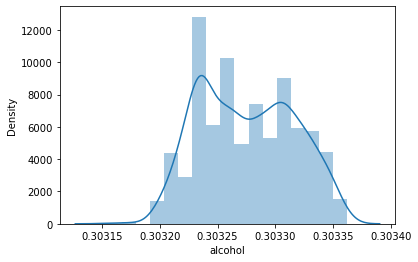

In [80]:
sn.distplot(df["alcohol"])

In [81]:
df.skew()

fixed acidity           0.381486
volatile acidity        0.368682
citric acid             0.294200
residual sugar          1.219006
chlorides               0.509926
total sulfur dioxide   -0.104489
density                 0.058167
pH                      0.118064
sulphates               0.330881
alcohol                 0.112418
quality                 0.410573
dtype: float64

# Input Splitting

In [82]:
x=df.drop(["quality"],axis=1)

In [83]:
y=df["quality"]

# Now we scale our independent variables

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [86]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.394706,0.630435,0.000000,0.267203,0.388764,0.544620,0.588785,0.724138,0.420692,0.358451
1,0.447707,0.826087,0.000000,0.449585,0.531356,0.757599,0.495327,0.367816,0.575141,0.475400
2,0.447707,0.695652,0.050633,0.378296,0.495921,0.689872,0.514019,0.436782,0.539248,0.475400
3,0.811955,0.173913,0.708861,0.267203,0.381336,0.722952,0.607477,0.321839,0.448607,0.475400
4,0.394706,0.630435,0.000000,0.267203,0.388764,0.544620,0.588785,0.724138,0.420692,0.358451
...,...,...,...,...,...,...,...,...,...,...
1459,0.216573,0.521739,0.101266,0.297029,0.483594,0.625572,0.317757,0.655172,0.448607,0.636964
1460,0.166639,0.467391,0.126582,0.352448,0.274572,0.671926,0.338318,0.735632,0.663620,0.758212
1461,0.232682,0.423913,0.164557,0.378296,0.388764,0.595647,0.396262,0.620690,0.653084,0.726913
1462,0.166639,0.570652,0.151899,0.297029,0.381336,0.625572,0.371028,0.793103,0.609484,0.573526


# Solving the class imbalance in quality

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
oversampling=SMOTE()
x,y=oversampling.fit_resample(x,y)

<AxesSubplot:xlabel='quality', ylabel='count'>

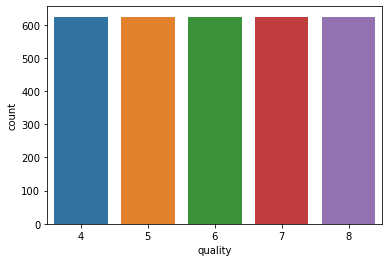

In [89]:
sn.countplot(y)

# Model Training

# Desition Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [98]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.50,random_state=343)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [103]:
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy: 72.56410256410255
CV Score: 68.3974358974359
Diffrence: 4.166666666666657


In [104]:
model = RidgeClassifier()
classify(model,x,y)

Accuracy: 54.35897435897436
CV Score: 51.47435897435898
Diffrence: 2.8846153846153797


In [105]:
model = RandomForestClassifier()
classify(model,x,y)

Accuracy: 83.52564102564102
CV Score: 78.5897435897436
Diffrence: 4.935897435897417


In [106]:
knn = KNeighborsClassifier()
classify(knn,x,y)

Accuracy: 75.76923076923077
CV Score: 73.5576923076923
Diffrence: 2.211538461538467


In [107]:
etc = ExtraTreesClassifier()
classify(etc,x,y)

Accuracy: 84.61538461538461
CV Score: 80.67307692307692
Diffrence: 3.9423076923076934


# Hyper Parameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
params={'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
}

In [110]:
gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.50,random_state=343)
g_res=gs.fit(X_train,Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [116]:
print(g_res.best_score_)
print(g_res.best_estimator_)
print(g_res.best_params_)

0.7634615384615384
KNeighborsClassifier(weights='distance')
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


In [121]:
params2={'metric': ['minkowski'], 
        'n_neighbors': [5], 
        'weights': ['distance']
}

In [122]:
gs = GridSearchCV(KNeighborsClassifier(), params2, verbose = 1, cv=3, n_jobs = -1)

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.50,random_state=343)
g_res=gs.fit(X_train,Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [124]:
print(g_res.best_score_)
print(g_res.best_estimator_)
print(g_res.best_params_)

0.7634615384615384
KNeighborsClassifier(weights='distance')
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


# Predicting And Checking The Accuracy

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [134]:
y_train_pred = g_res.predict(X_train)
y_test_pred = g_res.predict(X_test)

In [135]:
print(accuracy_score(Y_train, y_train_pred))
confusion_matrix(Y_train, y_train_pred)

1.0


array([[319,   0,   0,   0,   0],
       [  0, 326,   0,   0,   0],
       [  0,   0, 316,   0,   0],
       [  0,   0,   0, 307,   0],
       [  0,   0,   0,   0, 292]], dtype=int64)

# Saving The Model

In [136]:
import joblib
joblib.dump(g_res,r"C:\Users\Avinash\Desktop\Projects\P3=wine\wine.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\P3=wine\\wine.pkl']